<a href="https://colab.research.google.com/github/p204667/SI101-Atividades/blob/master/atividade_resumoDados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Pedro Igor Marques RA:204667**

**Guilherme Bonadio de Lima RA:235877**

---
Dados sobre o **Campeonato Brasileiro de 2009 a 2018**.



In [0]:
%matplotlib inline
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [0]:
dadosCampeonato=pd.read_csv("Tabela_Clubes.csv",decimal=',')
dadosCampeonato.drop(['Unnamed: 13','Unnamed: 14','Unnamed: 15','Unnamed: 16'],axis=1,inplace=True)
dadosCampeonato.Ano=dadosCampeonato.Ano.add(1)
dadosCampeonato.rename(columns={'Derrotas':'Empates','Empates':'Derrotas'},inplace=True)
dadosCampeonato.head(1)

,Ano,Pos.,Clubes,Vitorias,Empates,Derrotas,GolsF/S,Saldo,Qtd_Jogadores,Idade_Media,Estrangeiros,Valor_total,Media_Valor
0,2018,18,America-MG,10,10,18,30:47,-17,51,24.8,0,27350000,536000


In [0]:
dadosCampeonato.Qtd_Jogadores.describe()

count    200.00000
mean      43.23000
std        9.47661
min       20.00000
25%       36.00000
50%       43.00000
75%       50.00000
max       77.00000
Name: Qtd_Jogadores, dtype: float64

Informações sobre a quantidade de jogadores

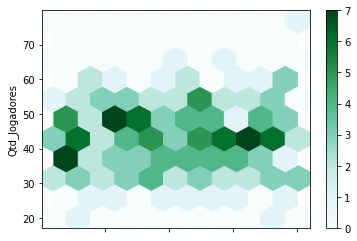

In [0]:
dadosCampeonato.plot.hexbin(x='Pos.',y='Qtd_Jogadores',gridsize=10)

A flexibilidade de alteração na seleção do time devido à quantidade de jogadores não influencia na posição 

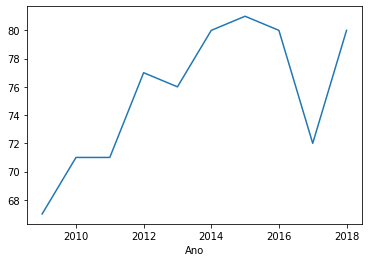

In [0]:
indiceAno=dadosCampeonato.set_index('Ano')
((3*indiceAno[indiceAno['Pos.'] == 1].Vitorias)+(indiceAno[indiceAno['Pos.'] == 1].Empates)).plot.line()

Pontuação do primeiro lugar em cada ano.

In [0]:
((3*dadosCampeonato[dadosCampeonato['Pos.'] == 1].Vitorias)+(dadosCampeonato[dadosCampeonato['Pos.'] == 1].Empates)).mean()

75.5

Média de pontos para a primeira posição

In [0]:
dadosCampeonato.Clubes.unique()

array(['America-MG', 'Athletico-PR', 'Atletico-MG', 'Bahia', 'Botafogo',
       'Ceara', 'Chapecoense', 'Corinthians', 'Cruzeiro', 'Flamengo',
       'Fluminense', 'Gremio', 'Internacional', 'Palmeiras', 'Parana',
       'Santos', 'Sao Paulo', 'Sport', 'Vasco', 'Vitoria', 'Atletico-GO',
       'Avai', 'Coritiba', 'Ponte Preta', 'Figueirense', 'Santa Cruz',
       'Goias', 'Joinville', 'Criciuma', 'Nautico', 'Portuguesa',
       'Guarani', 'Prudente', 'Santo Andre'], dtype=object)

Times que participaram em pelo menos um campeonato do período

In [0]:
dadosCampeonato[dadosCampeonato["Pos."]==1].Clubes.value_counts()

Corinthians    3
Palmeiras      2
Fluminense     2
Cruzeiro       2
Flamengo       1
Name: Clubes, dtype: int64

Campeões juntamente com a quantidade de vezes que ganharam

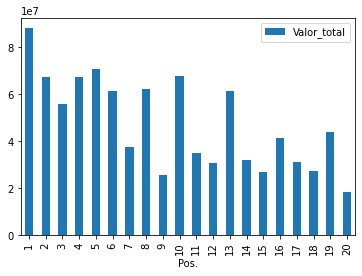

In [0]:
dadosCampeonato[dadosCampeonato.Ano == 2018].sort_values('Pos.').plot.bar(x='Pos.',y='Valor_total')

Dinheiro gasto em relação a posição no campeonato de 2018

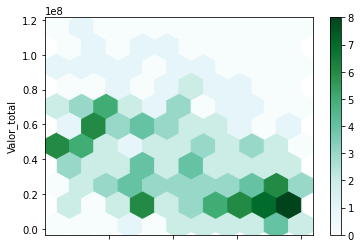

In [0]:
dadosCampeonato.plot.hexbin(x='Pos.',y="Valor_total",gridsize=10)

Quantidade de times por posição baseado no valor total da seleção

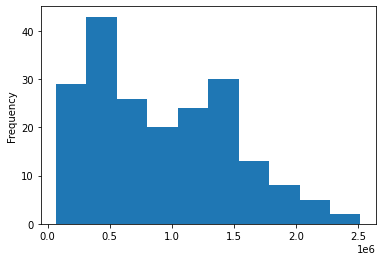

In [0]:
dadosCampeonato.Media_Valor.plot.hist()

Quantidade de times separados pelo valor médio por jogador

In [0]:
dadosCampeonato.Estrangeiros.value_counts().sort_index()

0    30
1    32
2    27
3    32
4    34
5    22
6    13
7     9
8     1
Name: Estrangeiros, dtype: int64

Quantidade de jogadores estrangeiros em todos times

#Atividade 2


In [0]:
dados=dadosCampeonato.drop(range(0,20),axis=0)
APrever=dadosCampeonato[dadosCampeonato.Ano == 2018].sort_values('Pos.')

* Setor **1** = Abaixo da Média
* Setor **2** = Próximo da Média
* Setor **3** = Acima da Média

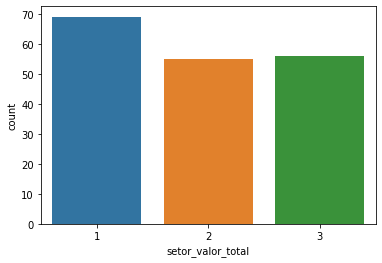

In [0]:
dados['setor_valor_total']=1
dados.loc[dados.Valor_total>=0.25e+08,"setor_valor_total"]=2
dados.loc[dados.Valor_total>=0.5e+08,"setor_valor_total"]=3
sns.countplot(x='setor_valor_total',data=dados)

Times distribuidos de modo equilibrado para que todos os setores tivessem um bom número de referências para fazermos análise do gráfico.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


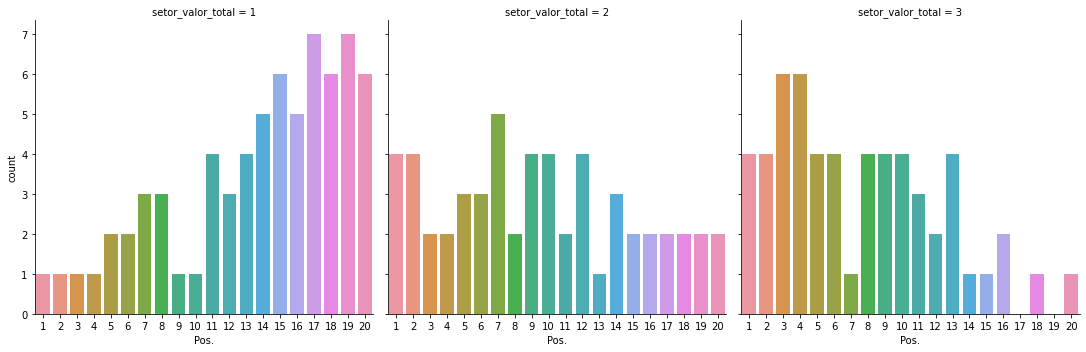

In [0]:
sns.factorplot(x='Pos.',col='setor_valor_total',kind='count',data=dados)

Aqui fica visível a diferença nas posições ocupadas no qual os times que investiram mais(**setor 3**) tiveram um melhor resultado

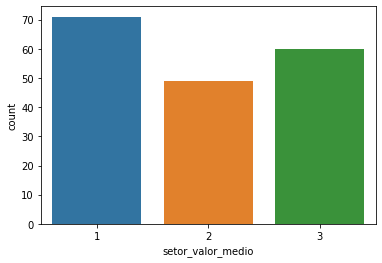

In [0]:
dados['setor_valor_medio']=1
dados.loc[dados.Media_Valor>=0.6e+06,"setor_valor_medio"]=2
dados.loc[dados.Media_Valor>=1.2e+06,"setor_valor_medio"]=3
sns.countplot(x='setor_valor_medio',data=dados)

Times distribuidos de modo equilibrado para que todos os setores tivessem um bom número de referências para fazermos análise do gráfico.

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


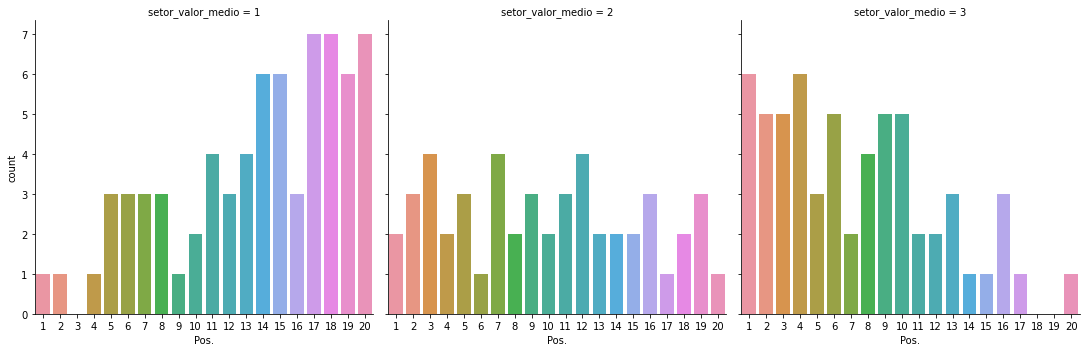

In [0]:
sns.factorplot(x='Pos.',col='setor_valor_medio',kind='count',data=dados)

Aqui fica visível a diferença nas posições ocupadas no qual os times que investiram mais por jogador(**setor 3**) tiveram um melhor desempenho.

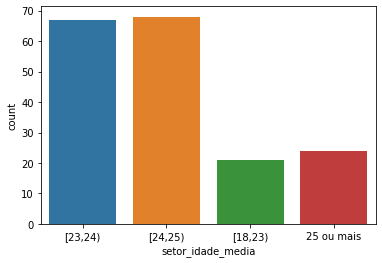

In [0]:
dados['setor_idade_media']='[18,23)'
dados.loc[dados.Idade_Media>=23,"setor_idade_media"]='[23,24)'
dados.loc[dados.Idade_Media>=24,"setor_idade_media"]='[24,25)'
dados.loc[dados.Idade_Media>=25,"setor_idade_media"]='25 ou mais'
sns.countplot(x='setor_idade_media',data=dados)

Fica evidente que a maioria dos times optam por possuir um time com média de idade de 23 até 25 anos

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


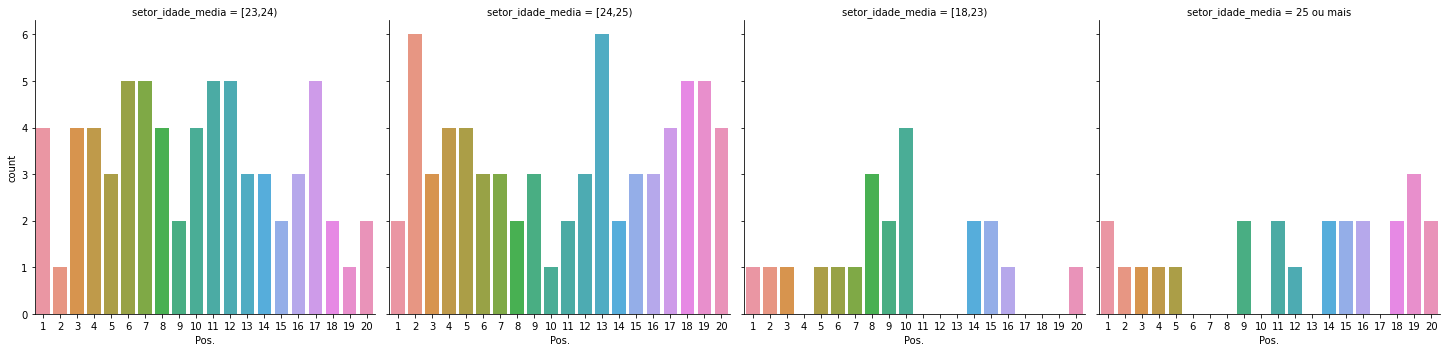

In [0]:
sns.factorplot(x='Pos.',col='setor_idade_media',kind='count',data=dados)

É possível ver que os jogadores de 23 a 24 anos possui uma média de rendimento melhor que os outros.

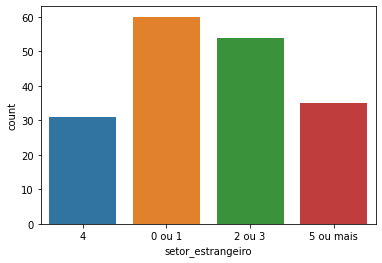

In [0]:
dados['setor_estrangeiro']='0 ou 1'
dados.loc[dados.Estrangeiros>=2,"setor_estrangeiro"]='2 ou 3'
dados.loc[dados.Estrangeiros>=4,"setor_estrangeiro"]=4
dados.loc[dados.Estrangeiros>=5,"setor_estrangeiro"]='5 ou mais'
sns.countplot(x='setor_estrangeiro',data=dados)

/usr/local/lib/python3.6/dist-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


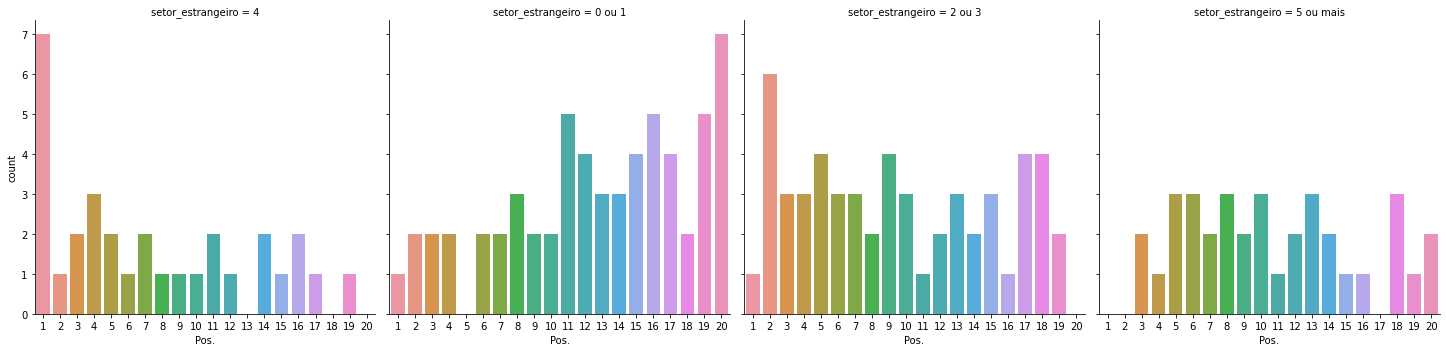

In [0]:
sns.factorplot(x='Pos.',col='setor_estrangeiro',kind='count',data=dados)

O melhores times possuem de 2 a 4 jogadores estrangeiros.

Usando os dados de **2018** para verificar validade das análises.

In [0]:
APrever['setor_valor_total']=1
APrever.loc[APrever.Valor_total>=0.25e+08,"setor_valor_total"]=2
APrever.loc[APrever.Valor_total>=0.5e+08,"setor_valor_total"]=3
APrever['pesos_valor_total']=0
APrever.loc[APrever.setor_valor_total==2,"pesos_valor_total"]=1
APrever.loc[APrever.setor_valor_total==3,"pesos_valor_total"]=2

In [0]:
APrever['setor_valor_medio']=1
APrever.loc[APrever.Media_Valor>=0.6e+06,"setor_valor_medio"]=2
APrever.loc[APrever.Media_Valor>=1.2e+06,"setor_valor_medio"]=3
APrever['pesos_valor_medio']=0
APrever.loc[APrever.setor_valor_medio==2,"pesos_valor_medio"]=1
APrever.loc[APrever.setor_valor_medio==3,"pesos_valor_medio"]=2

In [0]:
APrever['setor_idade_media']='[18,23)'
APrever.loc[APrever.Idade_Media>=23,"setor_idade_media"]='[23,24)'
APrever.loc[APrever.Idade_Media>=24,"setor_idade_media"]='[24,25)'
APrever.loc[APrever.Idade_Media>=25,"setor_idade_media"]='25 ou mais'
APrever['pesos_idade_media']=1
APrever.loc[APrever.setor_idade_media=='[23,24)',"pesos_idade_media"]=2
APrever.loc[APrever.setor_idade_media=='[24,25)',"pesos_idade_media"]=1
APrever.loc[APrever.setor_idade_media=='25 ou mais',"pesos_idade_media"]=0

In [0]:
APrever['setor_estrangeiro']=0
APrever.loc[APrever.Estrangeiros>=2,"setor_estrangeiro"]='2 ou 3'
APrever.loc[APrever.Estrangeiros>=4,"setor_estrangeiro"]=4
APrever.loc[APrever.Estrangeiros>=5,"setor_estrangeiro"]='5 ou mais'
APrever['pesos_estrangeiro']=0
APrever.loc[APrever.setor_estrangeiro=='2 ou 3',"pesos_estrangeiro"]=1
APrever.loc[APrever.setor_estrangeiro==4,"pesos_estrangeiro"]=2
APrever.loc[APrever.setor_estrangeiro=='5 ou mais',"pesos_estrangeiro"]=0

In [0]:
APrever['pontuaçãogeral']=APrever.pesos_idade_media+APrever.pesos_estrangeiro+APrever.pesos_valor_medio+APrever.pesos_valor_total
previsao=APrever.sort_values(["pontuaçãogeral","pesos_valor_total",'pesos_valor_medio',"pesos_idade_media"],ascending=[False,False,True,False]).loc[:,["Clubes","Pos.","pontuaçãogeral"]].reset_index(drop=True)
previsao.index=previsao.index +1
previsao['correto']= previsao.index == previsao['Pos.']
previsao['diferença']=previsao.index-previsao['Pos.' ]
previsao

,Clubes,Pos.,pontuaçãogeral,correto,diferença
1,Palmeiras,1,7,True,0
2,Flamengo,2,6,True,0
3,Sao Paulo,5,6,False,-2
4,Atletico-MG,6,6,False,-2
5,Santos,10,6,False,-5
6,Gremio,4,5,False,2
7,Internacional,3,5,False,4
8,Cruzeiro,8,5,True,0
9,Botafogo,9,5,True,0
10,Bahia,11,5,False,-1


**Resultado previsto** dos dados para o ano de **2018** 

#trabalho 3

In [0]:
#Passo 1:Importando os modelos
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LinearRegression

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import LeaveOneOut
from sklearn.metrics import accuracy_score

#Usando as colunas vitorias, empates e derrotas
como sabemos a classificacao é dada por **3*vitorias + empates** 

In [0]:
Xtest=dados.loc[:,['Vitorias','Derrotas','Empates']]#passo 3
ytest=dados['Pos.'] 

Xprev=APrever.loc[:,['Vitorias','Derrotas','Empates']]#a ser previsto

In [0]:
model=LinearRegression(fit_intercept=True) #passo 2
#pontuacao para divisao ideal
score=cross_val_score(model,Xtest,ytest,cv=9)
score.mean()

0.9167181958634048

In [0]:
modelTree=DecisionTreeClassifier()
scoreTree=cross_val_score(modelTree,Xtest,ytest,cv=9)
scoreTree.mean()

0.24444444444444446

In [0]:
modelKNC=KNeighborsClassifier()
scoreKNC=cross_val_score(modelKNC,Xtest,ytest,cv=9)
scoreKNC.mean()

0.2277777777777778

In [0]:
modelGauss=GaussianNB()
scoreGauss=cross_val_score(modelGauss,Xtest,ytest,cv=9)
scoreGauss.mean()

0.3277777777777777

Devido ao que tem maior pontuação, iremos utilizar o modelo de **regressão linear**

In [0]:
model.fit(Xtest,ytest)#passo 4
yPrev=model.predict(Xprev)

In [0]:
colocacao=pd.DataFrame({'Clubes':APrever.Clubes,'PosReal':APrever['Pos.'],'ordem':yPrev}) 
colocacao.sort_values('ordem',inplace=True)
colocacao.reset_index(drop=True,inplace=True)
colocacao.index=colocacao.index +1
colocacao['Correto']=colocacao.index==colocacao.PosReal
colocacao

,Clubes,PosReal,ordem,Correto
1,Palmeiras,1,-3.145171,True
2,Flamengo,2,0.639517,True
3,Internacional,3,2.269723,True
4,Gremio,4,3.731170,True
5,Sao Paulo,5,5.361376,True
6,Atletico-MG,6,6.916205,True
7,Athletico-PR,7,7.946756,True
8,Cruzeiro,8,10.007858,True
9,Botafogo,9,11.038409,True
10,Santos,10,11.469306,True


Uso da **matrix de confusão** para ver local de erro

Text(0.5, 15.0, 'valorReal')

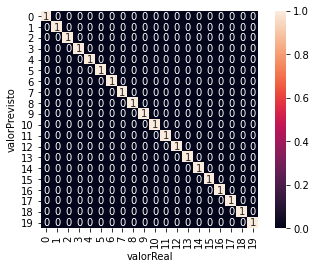

In [0]:
from sklearn.metrics import confusion_matrix
yReal=APrever['Pos.']
matrix=confusion_matrix(colocacao.index,colocacao.PosReal)
sns.heatmap(matrix,square=True,annot=True)
plt.ylabel('valorPrevisto')
plt.xlabel('valorReal')

No caso, aqui não teve nenhum erro porém, as colocações **13** e **14**, no arquivo principal, tiveram a ordem trocada devido ao **empate de pontuação**

#Analise sem a pontuação para tentar prever o resultado

In [0]:
Xdados=dados.loc[:,['Qtd_Jogadores','Idade_Media','Estrangeiros','Valor_total','Media_Valor']]
ydados=dados['Pos.'] 
Xprevisao=APrever.loc[:,['Qtd_Jogadores','Idade_Media','Estrangeiros','Valor_total','Media_Valor']]

In [0]:
modelGauss=GaussianNB()
scoreGauss2=cross_val_score(modelGauss,Xdados,ydados,cv=LeaveOneOut())
scoreGauss2.mean()

0.07777777777777778

In [0]:
modelTree2=DecisionTreeClassifier()
scoreTree2=cross_val_score(modelTree2,Xdados,ydados,cv=LeaveOneOut())
scoreTree2.mean()

0.03333333333333333

In [0]:
modelKNC2=KNeighborsClassifier()
scoreKNC2=cross_val_score(modelKNC2,Xdados,ydados,cv=LeaveOneOut())
scoreKNC2.mean()

0.05

Devido a precisão muito baixa para esses modelos no caso desses parâmetros, não encontramos um modelo considerável para fazer o teste de previsão